# * BRFSS Survey Data Analysis for the Year 2021-2022

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## - Load Data

In [9]:
df_BRFSS = pd.read_csv("../Data/BRFSS_preprocessed.csv")

In [10]:
df_BRFSS.head()

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.frtres1,x.vegres1,x.frutsu1,x.vegesu1,x.frtlt1a,x.veglt1a,x.frt16a,x.veg23a,x.fruite1,x.vegete1
0,1,1,1,1192021,1,19,2021,1100,2021000001,2021000001,...,1,1,100.0,214.0,1,1,1,1,0,0
1,2,1,1,1212021,1,21,2021,1100,2021000002,2021000002,...,1,1,100.0,128.0,1,1,1,1,0,0
2,3,1,1,1212021,1,21,2021,1100,2021000003,2021000003,...,1,1,100.0,71.0,1,2,1,1,0,0
3,4,1,1,1172021,1,17,2021,1100,2021000004,2021000004,...,1,1,114.0,165.0,1,1,1,1,0,0
4,5,1,1,1152021,1,15,2021,1100,2021000005,2021000005,...,1,1,100.0,258.0,1,1,1,1,0,0


## - Dataset Details

In [11]:
print('Total Records:', df_BRFSS.shape[0])
print('Total Columns:', df_BRFSS.shape[1])

Total Records: 438693
Total Columns: 304


In [12]:
print('\nColumn Names:\n', list(df_BRFSS.columns))


Column Names:
 ['Unnamed: 0', 'x.state', 'fmonth', 'idate', 'imonth', 'iday', 'iyear', 'dispcode', 'seqno', 'x.psu', 'ctelenm1', 'pvtresd1', 'colghous', 'statere1', 'celphon1', 'ladult1', 'colgsex', 'numadult', 'landsex', 'nummen', 'numwomen', 'respslct', 'safetime', 'ctelnum1', 'cellfon5', 'cadult1', 'cellsex', 'pvtresd3', 'cclghous', 'cstate1', 'landline', 'hhadult', 'sexvar', 'genhlth', 'physhlth', 'menthlth', 'poorhlth', 'priminsr', 'persdoc3', 'medcost1', 'checkup1', 'exerany2', 'bphigh6', 'bpmeds', 'cholchk3', 'toldhi3', 'cholmed3', 'cvdinfr4', 'cvdcrhd4', 'cvdstrk3', 'asthma3', 'asthnow', 'chcscncr', 'chcocncr', 'chccopd3', 'addepev3', 'chckdny2', 'diabete4', 'diabage3', 'havarth5', 'arthexer', 'arthedu', 'lmtjoin3', 'arthdis2', 'joinpai2', 'marital', 'educa', 'renthom1', 'numhhol3', 'numphon3', 'cpdemo1b', 'veteran3', 'employ1', 'children', 'income3', 'pregnant', 'weight2', 'height3', 'deaf', 'blind', 'decide', 'diffwalk', 'diffdres', 'diffalon', 'smoke100', 'smokday2', 'useno

In [13]:
# Columns with more than 50% of Null Values
# Null_cols = df_BRFSS.isnull().sum()/len(df_BRFSS)
# BRFSS_Nullcols = Null_cols[Null_cols>0.6].index
# display(len(BRFSS_Nullcols))

In [14]:
# BRFSS_Nullcols

## - Filter data to Indiana State

In [16]:
#Saperating out the Indiana State from rest of the states 
df_Indiana = df_BRFSS[df_BRFSS['x.state']==18]
print('IN Total Records:', df_Indiana.shape[0])
print('IN Total Columns:', df_Indiana.shape[1])

IN Total Records: 9929
IN Total Columns: 304


### Pre-processing: NaN removal

In [9]:
print('Columns containing number of null values:\n')
null_val = df_Indiana.isnull().sum().sort_values(ascending=False)

null_val[null_val>1000]

Columns containing number of null values:



stoltest    9929
pdiabtst    9929
crvclpap    9929
crvclhpv    9929
hadhyst2    9929
            ... 
potatoe1    1139
wtkg3       1120
frenchf1    1096
fvgreen1    1052
fruitju2    1012
Length: 180, dtype: int64

In [57]:
# print('Columns containing all the values null:\n')
# print(df_Indiana.columns[df_Indiana.isnull().all()])

print('\nNan removal: Remove col if all values are null') # remove column if all the values are null
df_Indiana_na = df_Indiana.dropna(axis=1, how='all')
df_IN = df_Indiana_na.drop(['Unnamed: 0'], axis=1)

print('Total Records:', df_IN.shape[0])
print('Total Columns:', df_IN.shape[1])

df_IN.to_csv('../Data/BRFSS_IN_Pros.csv', index=False)


Nan removal: Remove col if all values are null
Total Records: 9929
Total Columns: 220


### Year wise count

In [25]:
print('Contains data of following year/count:')
print(df_IN['iyear'].value_counts())
# print('\n\nIndiana State Data:\n', df_IN)

Contains data of following year/count:
2021    9439
2022     490
Name: iyear, dtype: int64


## Indicator Focused Analysis

1. Quality of Life 	

    i. Poor or fair health Percentage of adults reporting fair or poor health (age-adjusted).

 	ii. Poor physical health days Average number of physically unhealthy days reported in past 30 days (age-adjusted).

 	iii. Poor mental health days Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

2. Tobacco Use	

    i. Adult smoking Percentage of adults who are current smokers (age-adjusted).

3. Diet and Exercise

    i. Adult obesity Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

 	ii. Physical inactivity	Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

4. Alcohol and Drug Use	

    i. Excessive drinking Percentage of adults reporting binge or heavy drinking (age-adjusted).
    

## - Column selection based on indicators

In [26]:
# Selecting the columns based on the above indicators
df_IN_Health = df_IN.filter(regex='smoke|_smoker3|genhlth|menthlth|poorhlth|physhlth|age|drug|alcohol|Alcohal|idate|imonth|iday|iyear|exerany2|x.rfbing5|x.rfbmi5|drnk3ge5|x.imprace|cadult1|ladult1|x.racegr3|x.race')

print('Total Records:', df_IN_Health.shape[0])
print('Total Columns:', df_IN_Health.shape[1])

Total Records: 9929
Total Columns: 27


In [27]:
# remove columns having 70% null values
# df_IN_Health = df_IN_Health.drop(df_IN_Health.columns[df_IN_Health.isnull().mean() > 0.7 ],axis=1)
# df_IN_Health

## 1. Quality of Life

### 1.1 Poor or fair health: Percentage of adults reporting fair or poor health (age-adjusted)

In [28]:
# sns.countplot(data=df_IN_Health, x="genhlth")

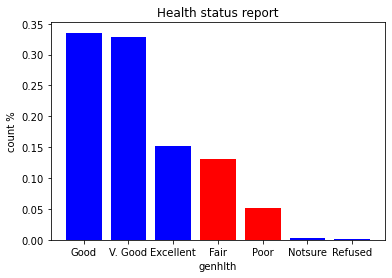

In [29]:
genhlth_dict = dict(df_IN_Health['genhlth'].value_counts()/len(df_IN_Health))
genhlth_key = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Notsure', 9.0:'Refused'}
# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

colors = ['red' if ((xi == 'Fair') or (xi == 'Poor')) else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('genhlth')
ax.set_ylabel('count %')
ax.set_title('Health status report')

# Show the plot
plt.show()

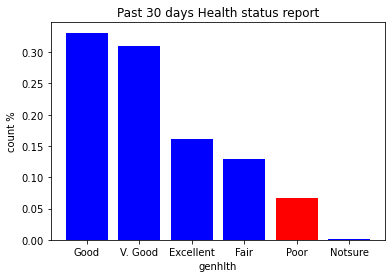

In [30]:
df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['genhlth'].value_counts()/len(df_IN_Health_30))
genhlth_key = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Notsure', 9.0:'Refused'}
# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

colors = ['red' if (xi == 'Poor') else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(names, values)

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('genhlth')
ax.set_ylabel('count %')
ax.set_title('Past 30 days Health status report')

# Show the plot
plt.show()

### 1.2. Poor physical health days: Average number of physically unhealthy days reported in past 30 days (age-adjusted).

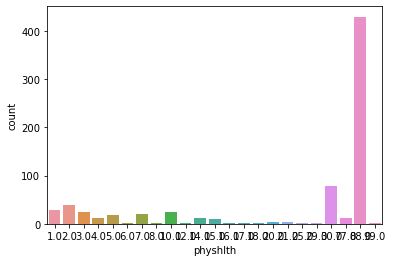

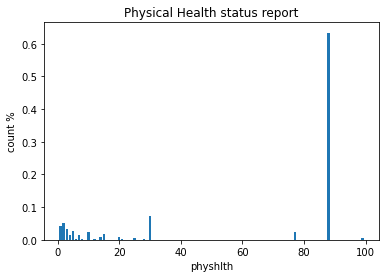

In [31]:
# physhlth - Poor physical health days

df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['physhlth'].value_counts()/len(df_IN_Health_30))

sns.countplot(data=df_IN_Health_30, x="physhlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''


genhlth_dict = dict(df_IN_Health['physhlth'].value_counts()/len(df_IN_Health))


import matplotlib.pyplot as plt
names = list(genhlth_dict.keys())
values = list(genhlth_dict.values())

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars with different colors
ax.bar(names, values)

# Set the labels and title
ax.set_xlabel('physhlth')
ax.set_ylabel('count %')
ax.set_title('Physical Health status report')

# Show the plot
plt.show()

### 1.3. Poor mental health days: Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

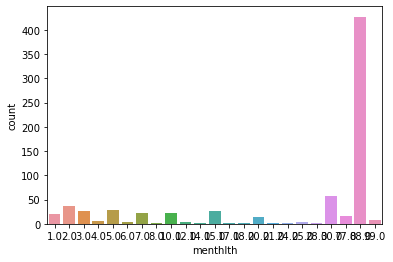

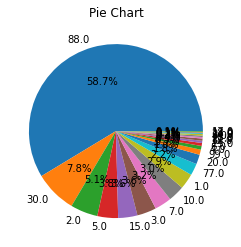

In [32]:
# menthlth - Poor mental health days

df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['menthlth'].value_counts()/len(df_IN_Health_30))

sns.countplot(data=df_IN_Health_30, x="menthlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

import matplotlib.pyplot as plt
names = list(genhlth_dict.keys())
values = list(genhlth_dict.values())


# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(values, labels=names, autopct='%1.1f%%')

# Set the title
ax.set_title('Pie Chart')

# Show the plot
plt.show()

## 2. Tobacco USe

### 2.1. Adult Smoking: Percentage of adults who are current smokers (age-adjusted).

In [33]:
# sns.countplot(data=df_IN_Health, x="x.smoker3")

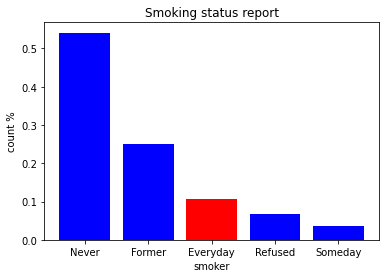

In [34]:
genhlth_dict = dict(df_IN_Health['x.smoker3'].value_counts()/len(df_IN_Health))
genhlth_key = {1 :'Everyday', 2:'Someday', 3:'Former', 4:'Never', 9:'Refused'}
# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

# plt.bar(range(len(new_dict)), values, tick_label=names)
# plt.xlabel('smoker')
# plt.ylabel('count (%)')
# plt.title('Smoking status report')
# plt.show()


colors = ['red' if (xi == 'Everyday') else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(names, values)

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('smoker')
ax.set_ylabel('count %')
ax.set_title('Smoking status report')

# Show the plot
plt.show()

## 3. Diet & Exercise

### 3.1 Adult Obesity - BMI > 25: Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

'\n1: No\n2: Yes\n9: Refused\n'

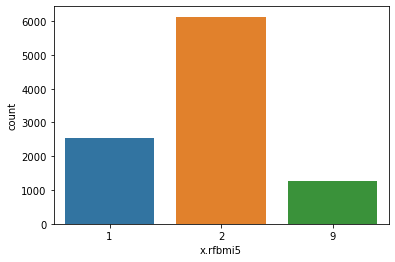

In [35]:
sns.countplot(data=df_IN_Health, x="x.rfbmi5")
'''
1: No
2: Yes
9: Refused
'''

### 3.2 Physical inactivity: Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

'\n1: Yes\n2: No\n7: Not sure\n9: Refused\n'

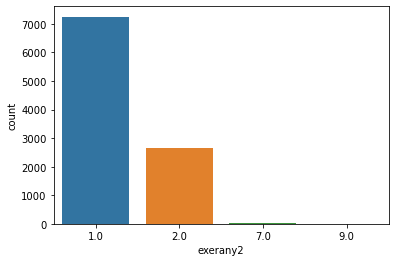

In [36]:
# exerany2
sns.countplot(data=df_IN_Health, x="exerany2")

'''
1: Yes
2: No
7: Not sure
9: Refused
'''

## 4. Alcohol & Drug Use

### 4.1 Excessive Drinking: Percentage of adults reporting binge or heavy drinking (age-adjusted)

{1: 79.0, 2: 11.0, 9: 9.0}


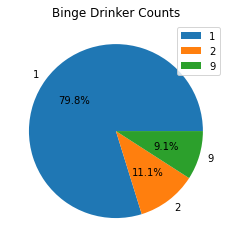

***There are only 11.1% who reported binge drinking


In [56]:
# Binge drinkers (males having five or more drinks on one occasion, females having four or more drinks on one occasion)
binge_dict = dict(round(df_IN_Health['x.rfbing5'].value_counts()/len(df_IN_Health)*100))
print(binge_dict)

plt.pie(binge_dict.values(), labels=binge_dict.keys(), autopct='%1.1f%%')

# set the x and y axis labels
plt.legend()

# set the plot title
plt.title('Binge Drinker Counts')

# display the plot
plt.show()

'''
1: No
2: Yes
9: Refused
'''

print('***There are only 11.1% who reported binge drinking')

In [44]:
# Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion?

# sns.countplot(data=df_IN_Health, x="drnk3ge5")
'''
1-76: No of days
88:   None
77:   Not sure
99:   Refused
'''

'\n1-76: No of days\n88:   None\n77:   Not sure\n99:   Refused\n'

## - Weight Factor ~ 6.8 M

In [98]:
# weight features

print(df_Indiana[['x.llcpwt2']].sum())
print(df_Indiana[['x.llcpwt']].sum())
print(df_Indiana[['x.cllcpwt']].sum())

total=(1565837+5262173)
print('\nLLCPWT ~6.8 M:', total)

x.llcpwt2    5262173.0
dtype: float64
x.llcpwt    5262173.0
dtype: float64
x.cllcpwt    1565837.0
dtype: float64

LLCPWT ~6.8 M: 6828010


## - Reference Var

### Age Var | Filter: 55+, 55-64, 65-84, 85+
AGEG5YR (5 yer group)
CADULT1 (1: yes 18>, Blank: not asked/missing) landline
LADULT1 (1: yes, 2: Terminate phone cal, Blank: missing) cellphone

### Race Var | Filter: white, black, hispanic, other
IMPRACE (imputed if not answered), RACE, RACEGR3
white, black, asian, american, hispanic, other
